### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist and a Data Analyst in this company, Perform an Exploratory Data Analysis (EDA) on the dataset given, return actionable insights and make recommendations.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

# Understanding the problem statement and Need
FoodHub wants to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience...

Explository Analysis to be performed...

Parameters to check --- Food preparation time, cost_of_the_order...
How many times has a unique customer made orders (customer_id)?
Which cuisines have the least preparation time?
Cuisines with the highest rating?
Most Expensive cuisine?


# Description 

Step 1
# Import Libraries & Dataset

In [1]:
## import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import dataset
df = pd.read_csv(r"C:\Users\user\Desktop\SQI_level3\Project\foodhub_order.csv")
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [3]:
# describe
# df.info() # no missing value
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [4]:
# Total number of unique customers
unique_customers = df['customer_id'].nunique()

print(f"The number of unique customers are {unique_customers}. The customers must have ordered either once or twice")

The number of unique customers are 1200. The customers must have ordered either once or twice


In [5]:
print("1898 Records... 1200 customers, i.e., some customers have purchased more than once..")

1898 Records... 1200 customers, i.e., some customers have purchased more than once..


In [6]:
# confirm hypothesis  
df.groupby('customer_id')['cuisine_type'].count().head(15)

customer_id
1311     1
5139     1
5444     1
5693     1
6987     2
7567     1
14869    3
17495    1
18902    1
22405    1
27365    1
27609    3
35309    2
35432    2
35631    1
Name: cuisine_type, dtype: int64

In [7]:
# Rating count and percentage 
# df.rating.value_counts()
rating_percert = df.rating.value_counts(normalize=True) * 100 
rating_percert.round()

Not given    39.0
5            31.0
4            20.0
3            10.0
Name: rating, dtype: float64

In [8]:
# count the Total number of unique restaurant_name
unique_res = df['restaurant_name'].nunique()
print(f"The total numbers of restaurants meeting orders are {unique_res}.")

The total numbers of restaurants meeting orders are 178.


In [9]:
# count the total number of unique cuisine_type
# unique_cuisine = df.cuisine_type.unique()
# unique_cuisine = df['cuisine_type'].unique()
unique_cuisine = df['cuisine_type'].nunique()

# unique_cuisine
print(f"{unique_cuisine} cuisine types are in the dataset.")

14 cuisine types are in the dataset.


In [10]:
# Plot graph 

In [11]:
company = "FoodHub"
print(f"Description: \nThe dataset (1898 rows) shows that - {unique_res} restaurants offer {unique_cuisine} major cuisine types to {unique_customers} customers on {company}")

Description: 
The dataset (1898 rows) shows that - 178 restaurants offer 14 major cuisine types to 1200 customers on FoodHub


In [12]:
# Customers are conversant with restaurants, not just the cuisine type.
# It will be important to explore the performance of the restaurants by considering preparation time and rating.
# And also the preparation_time for cuisine... 
# What could influence rating? 
# Could it be the prepartion_time or the delivery_time

In [13]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [14]:
plt.figure?

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


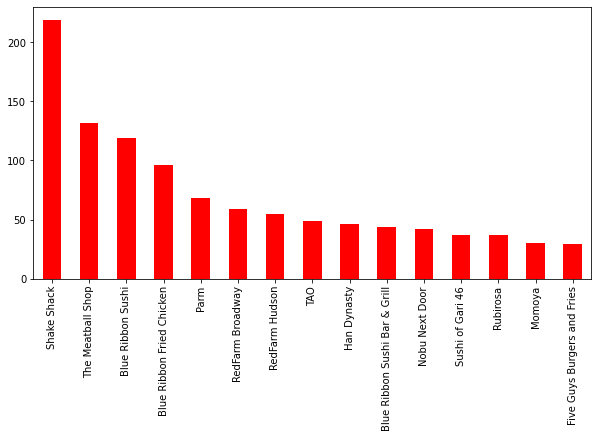

In [15]:
# Restaurant ordering rate

restaurant_ordering_rate = df.restaurant_name.value_counts()
print(restaurant_ordering_rate.head(5))

# Graphical represantation of top 15 restaurants with the highest order...
plt.figure(figsize=(10,5))
restaurant_ordering_rate.head(15).plot(kind='bar', color='red')
plt.xlabel("")
plt.ylabel("")
plt.show();

In [16]:
print(f"\n{restaurant_ordering_rate.idxmax()} has the highest order of {restaurant_ordering_rate.max()}\n")
print(f"{restaurant_ordering_rate.idxmin()} has the least order of {restaurant_ordering_rate.min()}")


Shake Shack has the highest order of 219

Pepe Giallo has the least order of 1


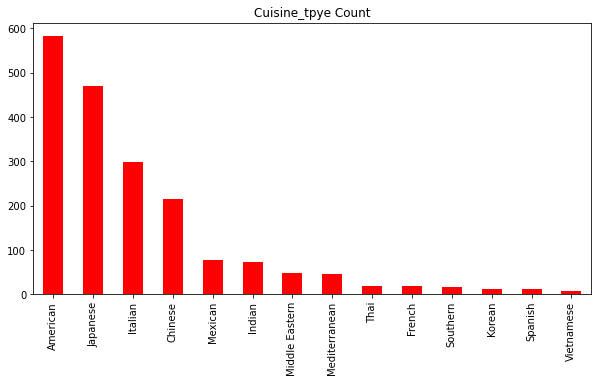

In [17]:
# Cuisine_type ordering rate 
# count 
cuisine_type_count = df['cuisine_type'].value_counts()
# print(cuisine_type_count)

# Graphical Representaion 
plt.figure(figsize=(10,5))
cuisine_type_count.plot(kind="bar", color='red')
plt.title("Cuisine_tpye Count")
plt.show();

In [18]:
print(f"{cuisine_type_count.idxmax()} has the maximum order of {cuisine_type_count.max()}\n")
print(f"{cuisine_type_count.idxmin()} has the minimum order of {cuisine_type_count.min()}\n")

American has the maximum order of 584

Vietnamese has the minimum order of 7



In [19]:
df.head(3)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28


In [20]:
# cost of order
df.cost_of_the_order.nunique()

312

In [21]:
# df['rating'][0] = 0
df.head()
# df.rating[1] = 0;

# keep for cuisine's - preparation time and c
# cost_max = df.groupby("cost_of_the_order")['cuisine_type'].aggregate(['sum',np.mean])
# cost_max

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


# Group one column

In [22]:


df.groupby('cuisine_type').max()


,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,1478444,403019,brgr,33.18,Weekend,Not given,35,33
Chinese,1478441,402215,Xi'an Famous Foods,34.19,Weekend,Not given,35,33
French,1478349,389740,Le Grainne Cafe,29.25,Weekend,Not given,35,29
Indian,1478436,399832,indikitch,33.03,Weekend,Not given,35,32
Italian,1478425,404649,da Umberto,33.03,Weekend,Not given,35,33
Japanese,1478440,405334,Yama Japanese Restaurant,33.37,Weekend,Not given,35,33
Korean,1478363,384698,Woorijip,30.75,Weekend,Not given,33,26
Mediterranean,1478427,354719,Pylos,35.41,Weekend,Not given,35,33
Mexican,1478437,384390,Tres Carnes,33.32,Weekend,Not given,35,33


In [23]:
# df.groupby('cuisine_type').min()
df.groupby('food_preparation_time').min()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,delivery_time
food_preparation_time,,,,,,,,
20,1476548,6987,67 Burger,American,4.85,Weekday,3,15
21,1476614,27609,Anjappar Chettinad,American,5.67,Weekday,3,15
22,1476547,1311,12 Chairs,American,4.80,Weekday,3,15
23,1476561,14869,Asuka Sushi,American,4.71,Weekday,3,15
24,1476559,35309,Amy Ruth's,American,5.67,Weekday,3,15
25,1476549,14869,Asuka Sushi,American,5.73,Weekday,3,15
26,1476550,17495,5 Napkin Burger,American,5.68,Weekday,3,15
27,1476556,40808,12 Chairs,American,5.34,Weekday,3,15
28,1476584,5139,'wichcraft,American,4.47,Weekday,3,15


In [24]:
# Groupby the cuisine-type and food_preparation_time
df.groupby('cuisine_type').agg({'food_preparation_time':['mean','max','min','count', 'sum'],
#                                 'cost_of_the_order':['mean','max','min','count', 'sum']
                               })

food_preparation_time                     
                                mean max min count    sum
cuisine_type                                             
American                   27.440068  35  20   584  16025
Chinese                    27.511628  35  20   215   5915
French                     26.888889  35  21    18    484
Indian                     27.109589  35  20    73   1979
Italian                    27.483221  35  20   298   8190
Japanese                   27.510638  35  20   470  12930
Korean                     25.461538  33  20    13    331
Mediterranean              27.000000  35  20    46   1242
Mexican                    26.727273  35  20    77   2058
Middle Eastern             26.673469  34  20    49   1307
Southern                   27.588235  35  20    17    469
Spanish                    26.916667  35  20    12    323
Thai                       27.315789  35  21    19    519
Vietnamese                 25.714286  33  20     7    180

In [25]:
# Analysis on minimum preparation time at 20mins  
df_prep_at20 = df[df['food_preparation_time'] == 20]
df_prep_at20.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
25,1476693,41877,Cafe Mogador,Middle Eastern,29.10,Weekday,5,20,29
29,1476889,149984,Sushi of Gari 46,Japanese,12.18,Weekday,Not given,20,29
38,1477999,208020,Haru Gramercy Park,Japanese,29.83,Weekday,5,20,32
58,1477243,176234,Prosperity Dumpling,Chinese,14.02,Weekend,5,20,30


In [26]:
# Cuisine with the highest least preparation time 
cuisineprep_at20 = df_prep_at20.cuisine_type.value_counts(normalize=True) * 100
cuisineprep_at20 = df_prep_at20.cuisine_type.value_counts()
cuisineprep_at20

American          42
Japanese          22
Chinese           20
Italian           15
Indian             6
Mediterranean      4
Middle Eastern     3
Vietnamese         2
Southern           2
Spanish            1
Korean             1
Mexican            1
Name: cuisine_type, dtype: int64

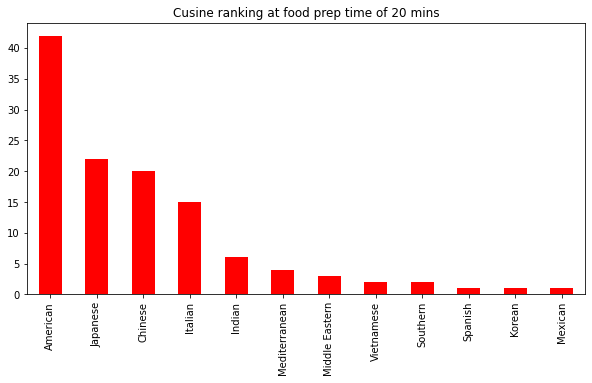

In [27]:
plt.figure(figsize=(10,5))
cuisineprep_at20.plot(kind='bar', color='red')
plt.title("Cusine ranking at food prep time of 20 mins")
plt.show()

# The American ranks best at 20 mins minimum preparation time 

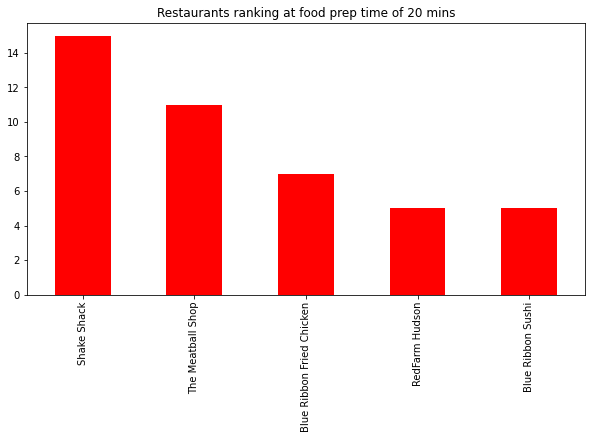

In [28]:
# Restaurant at 20mins prep time  
restaurant_at20 = df_prep_at20.restaurant_name.value_counts()
# restaurant_at20


plt.figure(figsize=(10,5))
restaurant_at20.head(5).plot(kind='bar', color='red')
plt.title("Restaurants ranking at food prep time of 20 mins")
plt.show()



In [29]:
# Groupby the cuisine-type 
df.groupby('restaurant_name').agg({'food_preparation_time':['mean','max','min','count', 'sum'],
#                                 'cost_of_the_order':['mean','max','min','count', 'sum']
                               }) 

food_preparation_time                   
                                  mean max min count  sum
restaurant_name                                          
'wichcraft                   28.000000  28  28     1   28
12 Chairs                    27.000000  31  22     4  108
5 Napkin Burger              30.200000  35  26     5  151
67 Burger                    20.000000  20  20     1   20
Alidoro                      34.000000  34  34     1   34
...                                ...  ..  ..   ...  ...
Zero Otto Nove               30.000000  31  29     2   60
brgr                         25.000000  26  24     2   50
da Umberto                   24.333333  30  20     3   73
ilili Restaurant             26.388889  34  21    18  475
indikitch                    30.750000  35  20     4  123

[178 rows x 5 columns]

In [30]:
# df.groupby(['restaurant_name','cuisine_type']).agg({'food_preparation_time':['mean', 'count']})

In [31]:
# Day of the week performance 
pivot2 = df.pivot_table(index='cuisine_type', 
                        columns='day_of_the_week', 
                        values='cost_of_the_order',
                        aggfunc='count'
                       )
pivot2

day_of_the_week,Weekday,Weekend
cuisine_type,,
American,169,415
Chinese,52,163
French,5,13
Indian,24,49
Italian,91,207
Japanese,135,335
Korean,2,11
Mediterranean,14,32
Mexican,24,53


In [33]:
df.head(3)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28


In [47]:
# cost_of_the_day analysis
cost = df['cost_of_the_order']
# cost.max()

cost_by_group= df.groupby('cost_of_the_order').max()
cost_by_group

,order_id,customer_id,restaurant_name,cuisine_type,day_of_the_week,rating,food_preparation_time,delivery_time
cost_of_the_order,,,,,,,,
4.47,1477349,52327,Nobu Next Door,Japanese,Weekend,5,28,26
4.66,1476877,53289,The Loop,Japanese,Weekend,Not given,34,25
4.71,1477788,270444,P.J. Clarke's,American,Weekend,Not given,23,15
4.75,1477790,145389,Shake Shack,Chinese,Weekend,4,35,28
4.80,1477787,14869,Shake Shack,American,Weekend,4,22,24
...,...,...,...,...,...,...,...,...
33.22,1478143,337525,TAO,Japanese,Weekend,Not given,23,19
33.32,1478329,116992,Tres Carnes,Mexican,Weekday,4,21,33
33.37,1477700,275689,Nobu Next Door,Japanese,Weekend,4,32,27


In [48]:
cuisine_with_max_cost = df[df['cost_of_the_order'] == cost.max()]['cuisine_type'].values[0]
cuisine_with_max_cost
cuisine_with_min_cost = df[df['cost_of_the_order'] == cost.min()]['cuisine_type'].values[0]
cuisine_with_min_cost

'Japanese'

In [49]:
print(f"The most expensive cuisine type is the {cuisine_with_max_cost} at {cost.max()}")
print(f"The least expensive cuisine type is the {cuisine_with_min_cost} at {cost.min()}")

The most expensive cuisine type is the Mediterranean at 35.41
The least expensive cuisine type is the Japanese at 4.47


In [53]:
# Check for the highest price of the american cuisine_type
american_max = df[df["cuisine_type"] == 'American']["cost_of_the_order"]
american_max.value_counts()

12.18    37
12.13    24
24.25    15
24.30    13
24.20    12
         ..
18.24     1
4.75      1
8.49      1
20.47     1
13.97     1
Name: cost_of_the_order, Length: 183, dtype: int64

### **Insights & Recommendations**  

#### **1. Overview of the Dataset**  
- The dataset consists of **1,898 rows**, capturing data from **178 restaurants** offering **14 major cuisine types** to **1,200 customers** on FoodHub.  

#### **2. Rating Insights & Recommendations**  
- **39% of users did not provide a rating**, while **31% rated 5, 20% rated 4, and 10% rated 3**.  
- Since ratings are crucial for decision-making and customer satisfaction analysis, **FoodHub should implement strategies to encourage more users to leave ratings**. Possible approaches include:  
  - Offering small incentives (e.g., discount codes, loyalty points).  
  - Sending follow-up reminders after an order.  
  - Simplifying the rating process (e.g., one-tap feedback).  

#### **3. Most Popular Cuisines & Impact of Preparation Time**  
- The **top five most ordered cuisines** are **American, Japanese, Italian, Chinese, and Mexican**, with **American cuisine ranking the highest**.  
- **American, Japanese, Chinese, and Italian cuisines also have the shortest preparation times (20 minutes),** which may contribute to their high order volume.  
- **Recommendation:** FoodHub could optimize the ordering system to prioritize fast-serving restaurants, highlighting them as “Quick Order” options for time-sensitive customers.  

#### **4. Top-Performing Restaurants**  
- The **top five best-performing restaurants** based on order volume are:  
  1. **Shake Shack** (Ranks highest)  
  2. The Meatball Shop  
  3. Blue Ribbon Sushi  
  4. Blue Ribbon Fried Chicken  
  5. Parm  

- Additionally, **Shake Shack, The Meatball Shop, and Blue Ribbon Fried Chicken** stand out for offering the **fastest food preparation time of 20 minutes**.  
- **Recommendation:** FoodHub can use these insights to promote fast-service restaurants, featuring them in a “Quick Bites” category.  

#### **5. Order Trends by Weekday vs. Weekend**  
- **Weekend orders surpass midweek orders**, indicating higher customer engagement on Saturdays and Sundays.  
- **Recommendation:**  
  - Implement **weekend-exclusive promotions** to maximize sales.  
  - Optimize restaurant availability and delivery logistics for peak weekend demand.  

By leveraging these insights, **FoodHub can enhance customer experience, boost engagement, and optimize its restaurant partnerships.** 🚀